In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [2]:
# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"

list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
    runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
for event in list(list_evO1O2.keys()):
    print(event)
    filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples

list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
    runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
for event in list(list_evO3a.keys()):
    if event != 'GW190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples

list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
    runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
for event in list(list_evO3b.keys()):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples

print(f"Using {len(posterior_dict)} events.")


GW150914
Using Overall_posterior posterior with a total of 8350 samples
GW151226
Using Overall_posterior posterior with a total of 52252 samples
GW170104
Using Overall_posterior posterior with a total of 24972 samples
GW170608
Using Overall_posterior posterior with a total of 6448 samples
GW170809
Using Overall_posterior posterior with a total of 14802 samples
GW170814
Using Overall_posterior posterior with a total of 40000 samples
GW170818
Using Overall_posterior posterior with a total of 5862 samples
GW170823
Using Overall_posterior posterior with a total of 4278 samples
GW190408_181802
Using PublicationSamples posterior with a total of 37366 samples
GW190412
Using PublicationSamples posterior with a total of 23984 samples
GW190503_185404
Using PublicationSamples posterior with a total of 37669 samples
GW190512_180714
Using PublicationSamples posterior with a total of 37247 samples
GW190513_205428
Using PublicationSamples posterior with a total of 39072 samples
GW190517_055101
Using 

In [3]:
population_model = 'BBH-mass_powerlaw-z_powerlaw'
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}_8/'
# We are going to update the injections with the new SNR cut to 12
injections.update_cut(snr_cut=11, ifar_cut=0)


Selecting injections with SNR 11.000000 and IFAR 0.000000 yr


In [4]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

# prior_dict['H0'] = 100.61
# prior_dict['Om0'] = 0.54
# prior_dict['σc'] = 0.5

# prior_dict["kappa"] = bilby.core.prior.Uniform(-6, 6, name='kappa')
# prior_dict["mmax"] = bilby.core.prior.Uniform(-6, 6, name='kappa')

prior_dict


{'alpha': Uniform(minimum=1.5, maximum=12, name='alpha', latex_label='alpha', unit=None, boundary=None),
 'beta': Uniform(minimum=-4, maximum=12, name='beta', latex_label='beta', unit=None, boundary=None),
 'mmin': Uniform(minimum=2, maximum=10, name='mmin', latex_label='mmin', unit=None, boundary=None),
 'mmax': Uniform(minimum=50, maximum=200, name='mmax', latex_label='mmax', unit=None, boundary=None),
 'gamma': Uniform(minimum=-4, maximum=10, name='gamma', latex_label='gamma', unit=None, boundary=None),
 'R0': Uniform(minimum=0, maximum=200, name='$R_0$', latex_label='$R_0$', unit=None, boundary=None),
 'H0': Uniform(minimum=10, maximum=200, name='$H_0$', latex_label='$H_0$', unit=None, boundary=None),
 'Om0': Uniform(minimum=0.0, maximum=1.0, name='$\\Omega_m$', latex_label='$\\Omega_m$', unit=None, boundary=None)}

18:36 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8/'
18:36 bilby INFO    : Search parameters:
18:36 bilby INFO    :   alpha = Uniform(minimum=1.5, maximum=12, name='alpha', latex_label='alpha', unit=None, boundary=None)
18:36 bilby INFO    :   beta = Uniform(minimum=-4, maximum=12, name='beta', latex_label='beta', unit=None, boundary=None)
18:36 bilby INFO    :   mmin = Uniform(minimum=2, maximum=10, name='mmin', latex_label='mmin', unit=None, boundary=None)
18:36 bilby INFO    :   mmax = Uniform(minimum=50, maximum=200, name='mmax', latex_label='mmax', unit=None, boundary=None)
18:36 bilby INFO    :   gamma = Uniform(minimum=-4, maximum=10, name='gamma', latex_label='gamma', unit=None, boundary=None)
18:36 bilby INFO    :   R0 = Uniform(minimum=0, maximum=200, name='$R_0$', latex_label='$R_0$', unit=None, boundary=None)
18:36 bilby INFO    :   H0 = Uniform(minimum=10, maximum=200, name='$H_0$', latex_label='$H_

Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:301: RuntimeWarning: invalid value encountered in log
18:36 bilby INFO    : Single likelihood evaluation took 3.107e-02 s


0it [00:00, ?it/s]

18:36 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 16, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7ff830a32310>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
18:36 bilby INFO    : Checkpoint every check_point_delta_t = 60s
18:36 bilby INFO    : Using dynesty version 1.0.1
18:36 bilby INFO    : Using the bilby-implemented rwalk sampl

1538it [01:45, 14.71it/s, bound:8 nc: 21 ncall:1.7e+04 eff:9.2% logz=-1064.83+/-0.14 dlogz:28.150>0.1] 

18:37 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2360it [02:46, 11.00it/s, bound:68 nc: 34 ncall:3.6e+04 eff:6.6% logz=-1052.16+/-0.14 dlogz:15.581>0.1]

18:38 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3102it [03:49, 10.99it/s, bound:127 nc: 21 ncall:5.4e+04 eff:5.7% logz=-1047.31+/-0.15 dlogz:9.764>0.1] 

18:39 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3751it [04:53,  9.92it/s, bound:184 nc: 47 ncall:7.2e+04 eff:5.2% logz=-1044.88+/-0.16 dlogz:8.126>0.1]

18:41 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4325it [05:54, 10.83it/s, bound:239 nc: 21 ncall:9.0e+04 eff:4.8% logz=-1043.44+/-0.17 dlogz:6.506>0.1]

18:42 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4916it [06:56,  9.59it/s, bound:297 nc: 52 ncall:1.1e+05 eff:4.6% logz=-1042.36+/-0.18 dlogz:4.261>0.1]

18:43 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5531it [08:00,  9.83it/s, bound:355 nc: 36 ncall:1.3e+05 eff:4.4% logz=-1041.63+/-0.18 dlogz:2.387>0.1]

18:44 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_resume.pickle
18:44 bilby INFO    : Writing 132 current samples to H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6187it [09:05,  8.49it/s, bound:413 nc: 47 ncall:1.4e+05 eff:4.3% logz=-1041.17+/-0.19 dlogz:1.543>0.1]

18:45 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_resume.pickle
18:45 bilby INFO    : Writing 276 current samples to H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6674it [10:09,  8.63it/s, bound:454 nc: 50 ncall:1.6e+05 eff:4.2% logz=-1040.98+/-0.19 dlogz:0.795>0.1]

18:46 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_resume.pickle
18:46 bilby INFO    : Writing 570 current samples to H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


7102it [11:11,  6.71it/s, bound:495 nc: 21 ncall:1.7e+05 eff:4.2% logz=-1040.88+/-0.19 dlogz:0.382>0.1]

18:47 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_resume.pickle
18:47 bilby INFO    : Writing 1326 current samples to H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


7555it [12:15,  6.78it/s, bound:538 nc: 30 ncall:1.8e+05 eff:4.1% logz=-1040.81+/-0.19 dlogz:0.276>0.1]

18:48 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_resume.pickle
18:48 bilby INFO    : Writing 2118 current samples to H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


7921it [13:18,  6.11it/s, bound:580 nc: 21 ncall:2.0e+05 eff:4.0% logz=-1040.78+/-0.19 dlogz:0.139>0.1]

18:49 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_resume.pickle
18:49 bilby INFO    : Writing 2647 current samples to H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


8090it [13:47,  8.49it/s, bound:600 nc:  1 ncall:2.0e+05 eff:4.1% logz=-1040.76+/-0.19 dlogz:0.051>0.1]

18:49 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_resume.pickle
18:49 bilby INFO    : Writing 2614 current samples to H0_GWTC-3_BBH-mass_powerlaw-z_powerlaw_flatLCDM_8//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
18:49 bilby INFO    : Starting to close worker pool.
18:49 bilby INFO    : Finished closing worker pool.


8090it [13:51,  9.73it/s, bound:600 nc:  1 ncall:2.0e+05 eff:4.2% logz=-1040.74+/-0.20 dlogz:0.000>0.1]



18:50 bilby INFO    : Sampling time: 0:13:03.648424
18:50 bilby INFO    : Summary of results:
nsamples: 8590
ln_noise_evidence:    nan
ln_evidence: -1040.743 +/-  0.202
ln_bayes_factor:    nan +/-  0.202



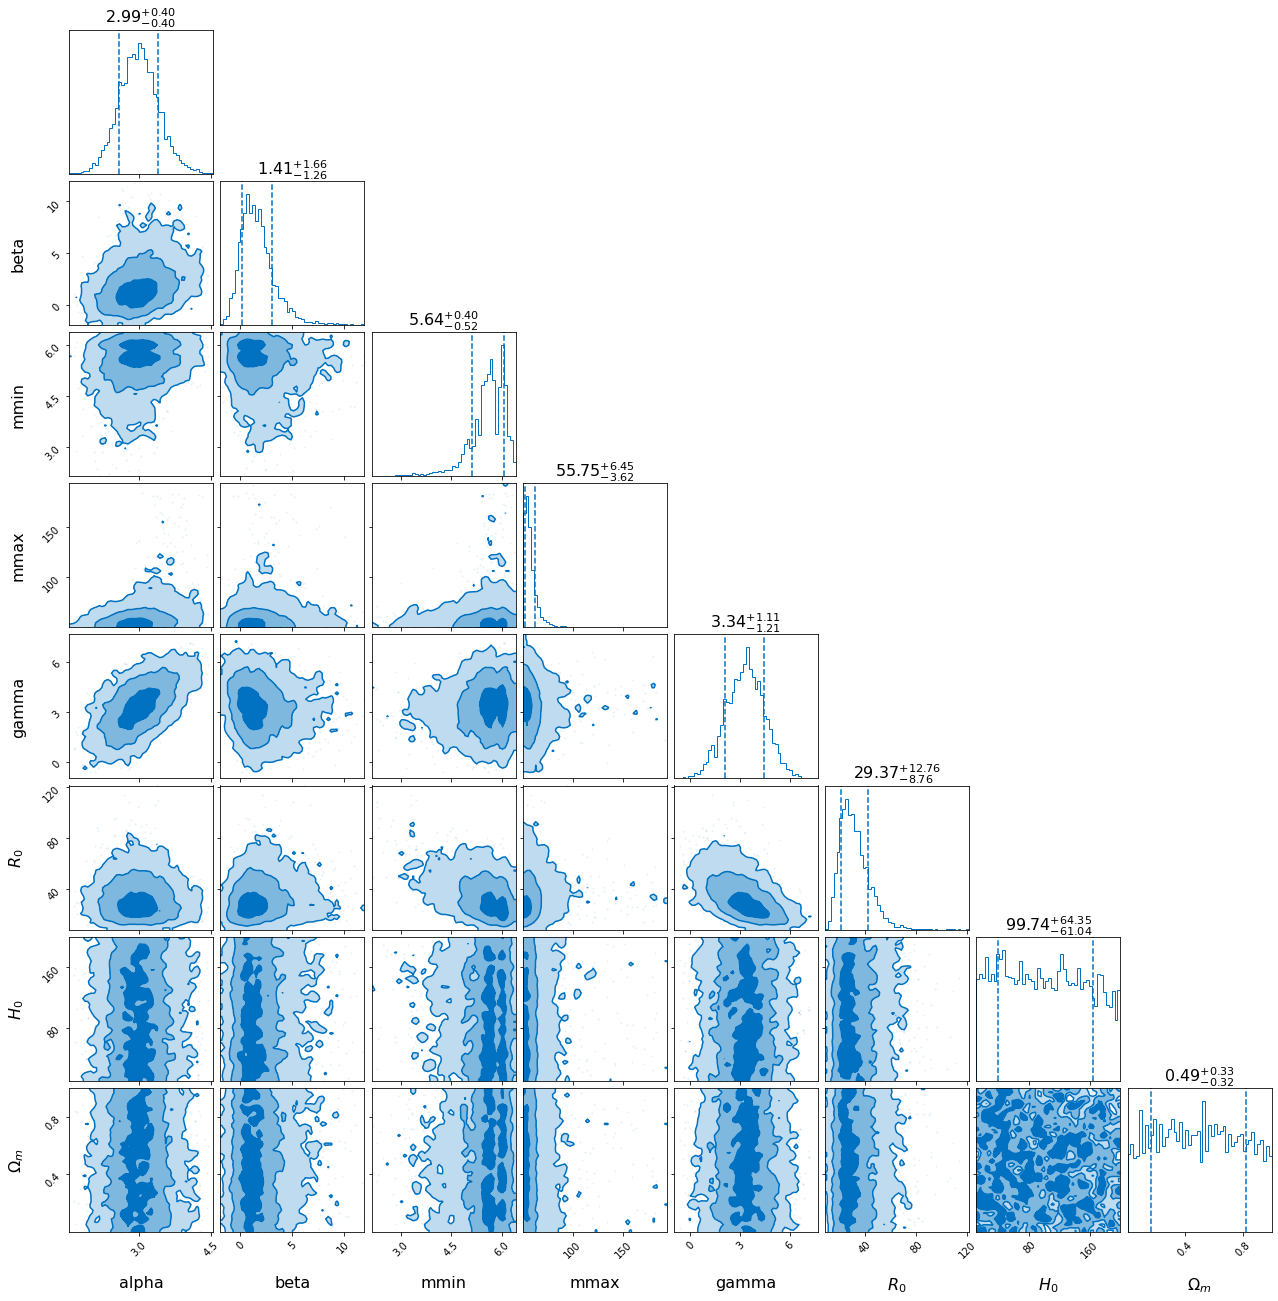

In [5]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2,
                            walks=20, outdir=outdir, label='dynesty', npool=16, parallel=2000, check_point_delta_t=60)
result.plot_corner()
